# **MEDICAL COST PREDICTION using RFR**
1. Mount the drive folder on colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
medi = pd.read_csv("drive/MyDrive/Content/Medical_cost.csv")
medi.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


3. Dataset description

In [ ]:
# Total number of entries in the dataset
medi.shape

(1338, 7)

In [ ]:
# Descriptive statistics of the dataset
medi.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Finding the null values in the dataset
medi.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


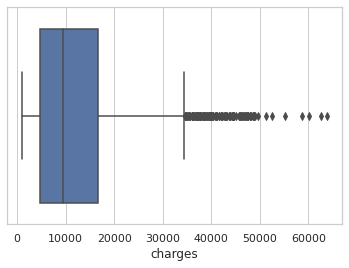

In [ ]:
# Understanding about columns first using BOXPLOT 
# BOXPLOT helps us to find OUTLIERS

sns.set_theme(style='whitegrid')
sns.boxplot(medi['charges'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


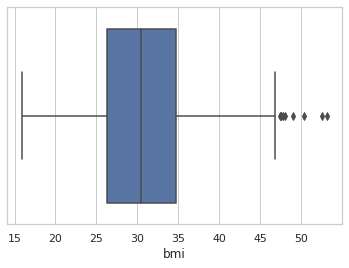

In [ ]:
sns.boxplot(medi['bmi'])

In [ ]:
# Understanding the dataset
medi[['sex','age']].groupby('sex').agg(['mean','count'])

age      
             mean count
sex                    
female  39.503021   662
male    38.917160   676

In [ ]:
# How many are smoking and not smoking?
medi['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
medi[['sex','children']].groupby('sex').agg(['mean'])

,children
,mean
sex,
female,1.074018
male,1.115385


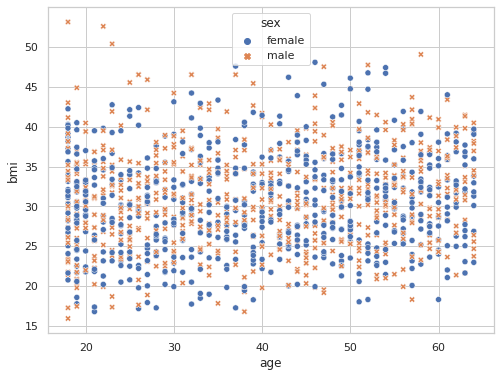

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=medi, x='age', y='bmi', hue='sex', style='sex')

In [ ]:
sns.scatterplot(data=medi, x='age', y='charges',hue='sex',style='sex')

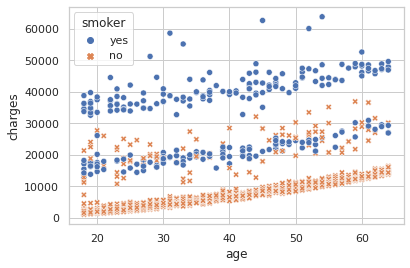

In [ ]:
sns.scatterplot(data=medi, x='age', y='charges',hue='smoker',style='smoker')

In [ ]:
# Removing the OUTLIER Values
medi = medi[medi['bmi'] < 47]
#medi = medi[medi['charges] < 25000]

medi.shape

(1329, 7)

In [ ]:
# Finding categorical data:

medi['smoker'].value_counts()

no     1058
yes     271
Name: smoker, dtype: int64

In [ ]:
medi['region'].value_counts()

southeast    357
northwest    325
southwest    324
northeast    323
Name: region, dtype: int64

In [ ]:
medi['sex'].value_counts()

male      670
female    659
Name: sex, dtype: int64

4. Converting the Categorical data into Numerical data

In [ ]:

from sklearn.preprocessing import LabelEncoder

def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)

In [ ]:
name_list = ['sex', 'smoker', 'region']
for name in name_list:
  medi[name] = label_encoded(medi[name])

medi.head()

sex ['female' 'male']
smoker ['no' 'yes']
region ['northeast' 'northwest' 'southeast' 'southwest']


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


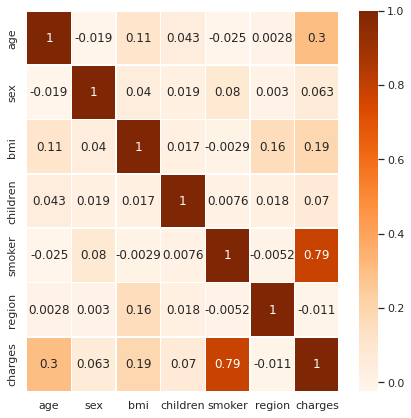

In [ ]:
# Plotting the CORRELATION MAP
plt.figure(figsize=(7,7))
sns.heatmap(medi.corr(),annot=True,cmap='Oranges',linewidths=.5)

5. RFR_Model Building

In [ ]:
# Output and Input data
y = medi['charges']
X = medi.drop(['charges'], axis = 1)

In [ ]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Splitting the dataset into training and testing datasets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
random_model = RandomForestRegressor(n_estimators=250, n_jobs = -1)

In [ ]:
# Fitting the dataset into the model
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

# Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

97.6 %


In [ ]:
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

83.19 %


In [ ]:
# Impact of Region on male
print("See the impact of Region on male\n")
random_model.predict([[35,1,27,0,0,0]])

See the impact of Region on male



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([5342.14454896])